In [20]:
import pandas as pd
import graphviz
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
!rm zoo.csv
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0501/zoo.csv

--2020-11-21 11:27:17--  https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0501/zoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.216.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10171 (9.9K) [text/plain]
Saving to: ‘zoo.csv’

zoo.csv             100%[===================>]   9.93K  --.-KB/s    in 0.001s  

2020-11-21 11:27:18 (7.07 MB/s) - ‘zoo.csv’ saved [10171/10171]



In [21]:
data = pd.read_csv("zoo.csv")
le = preprocessing.LabelEncoder()
for column_name in data.columns:
  if (data[column_name].dtype == object) & (column_name!='type'):
    data[column_name] = le.fit_transform(data[column_name])
data.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [22]:
# feature_names = ['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
#        'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
#        'legs', 'tail', 'domestic', 'catsize']
# target_values = data.type.unique()
# x = data[feature_names]
# y = data.type

In [23]:
# Features
feature_names = list(data.columns)
# Elimino type porque es la clase
feature_names.remove('type')
x = data[feature_names]

# Target
y = data.type
le.fit(data['type'])
target_values=le.classes_

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
arbol = tree.DecisionTreeClassifier(criterion='entropy')
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

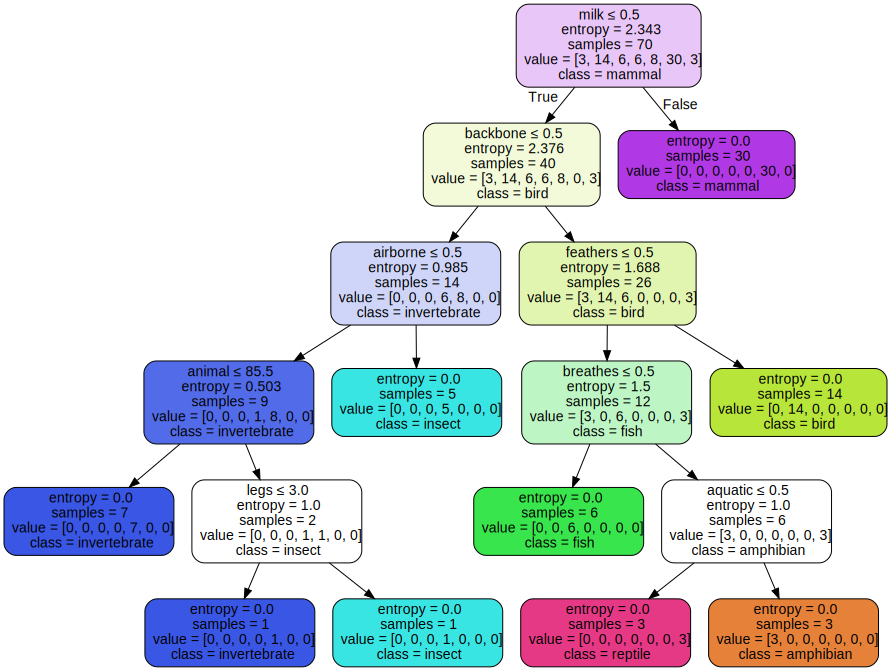

In [25]:
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

El arbol se creo con 70 observaciones y se usaron 31 para el test. El resultado es un arbol con mucha profundidad, 7 niveles y 9 hojas, estando las hojas "insect" e "invertebrate" repetidas.
El arbol es capaz de identificar rapidamente si el animal es "mammal" o "bird" pero los demas tipos necesita mas produndidad para poder identificarlos.

Accuracy: 0.9354838709677419
              precision    recall  f1-score   support

   amphibian       1.00      1.00      1.00         1
        bird       1.00      1.00      1.00         6
        fish       0.88      1.00      0.93         7
      insect       1.00      0.50      0.67         2
invertebrate       0.67      1.00      0.80         2
      mammal       1.00      1.00      1.00        11
     reptile       1.00      0.50      0.67         2

    accuracy                           0.94        31
   macro avg       0.93      0.86      0.87        31
weighted avg       0.95      0.94      0.93        31



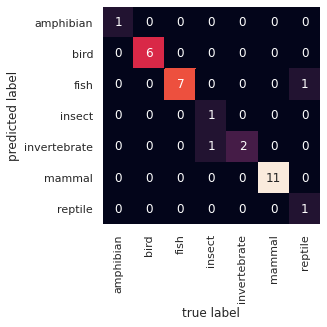

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Vemos un reporte de clasificación de varias métricas
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

El accurracy del arbol es bastante alto, del 93.35% habiendo identificado incorrectamente 2 casos (un insecto y un invertebrado).
De la matriz de se puede apreciar que etiqueto a un registro como u pez cuando era un reptil y en otro caso etiqueto a un insecto como un invertebrado.

A) Si quitamos el atributo animal no hay cambios en el arbol dado que el mismo no se utiliza para la decision.
Al ser el nombre unico, el atributo no sirve para generalizar.

B) El arbol generado posee 7 niveles, para lograr que el arbol tenga un maximo de 4 niveles usamos el atributo __max_depth__ en el contructor del arbol.
El resultado es:

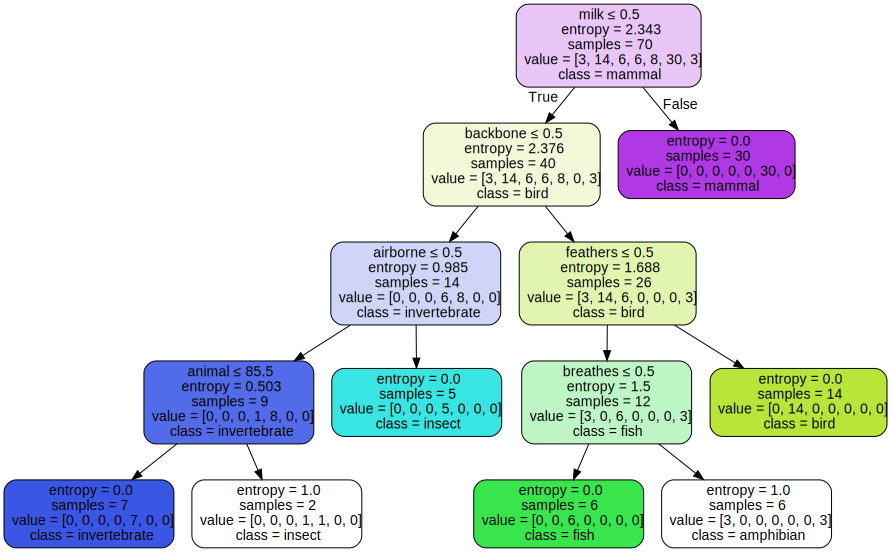

In [27]:
arbol = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Accuracy: 0.9032258064516129
              precision    recall  f1-score   support

   amphibian       0.50      1.00      0.67         1
        bird       1.00      1.00      1.00         6
        fish       0.88      1.00      0.93         7
      insect       1.00      0.50      0.67         2
invertebrate       0.67      1.00      0.80         2
      mammal       1.00      1.00      1.00        11
     reptile       0.00      0.00      0.00         2

    accuracy                           0.90        31
   macro avg       0.72      0.79      0.72        31
weighted avg       0.87      0.90      0.88        31



/home/lucas/git/Materias-UNLU/BDM 2020/decicionTrees/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


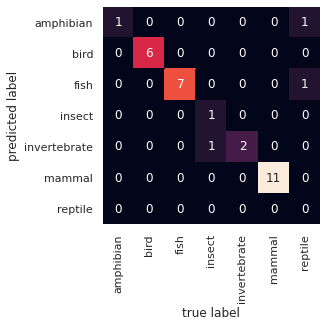

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

B bis) La reduccion de profundida del arbol disminuyo un poco la eficacia del mismo en un 3%, bajandolo a un 90.3%,
 se "perdio" la hoja de clasificacion de reptiles por lo que el arbol es incapaz de identificarlos (aunque solo eran 2).
 Considero que el arbol tiene pocos registros del tipo "reptil" e "amphibians" con varias diferencias por lo que necesita profundizar para identificarlos correctamente.

En la matriz de confucion se puede ver que el modelo etiqueto incorrectamente 2 reptiles (por que no los puede identificar) y el mismo caso que antes del insecto